In [9]:
import plotly.graph_objects as go
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import matplotlib
print(matplotlib.__version__)

3.1.0


In [10]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")

In [11]:
#why can i set heatmap template to simple white in layout but not in create call
#can do that with px but not go, it's in layout but can't initialize it with it

x = list(flights.columns.values)
y = flights.index.values
z=flights.values

fig = ff.create_annotated_heatmap(z=z, x=x, y=y, 
                                  colorscale='YlGnBu',
                                  xgap=1.5, ygap=1.5,
                                  showscale = True)

fig.update_layout(font=dict(
                  family="Arial", size=10.5,),
                  title=dict(text = "Confusion Matrix", x = 0.5, y = .95, font = dict(size=35)),
                  autosize=False, width=800, height=600,
                  showlegend=False, template = "plotly_white",
                  xaxis_title=dict(text ="True Label", font = dict(size = 25)),
                  yaxis_title=dict(text ="Predicted Label", font = dict(size = 25)))

fig.update_yaxes(autorange="reversed")
fig.update_xaxes(showgrid=False, side="bottom")
fig.show()

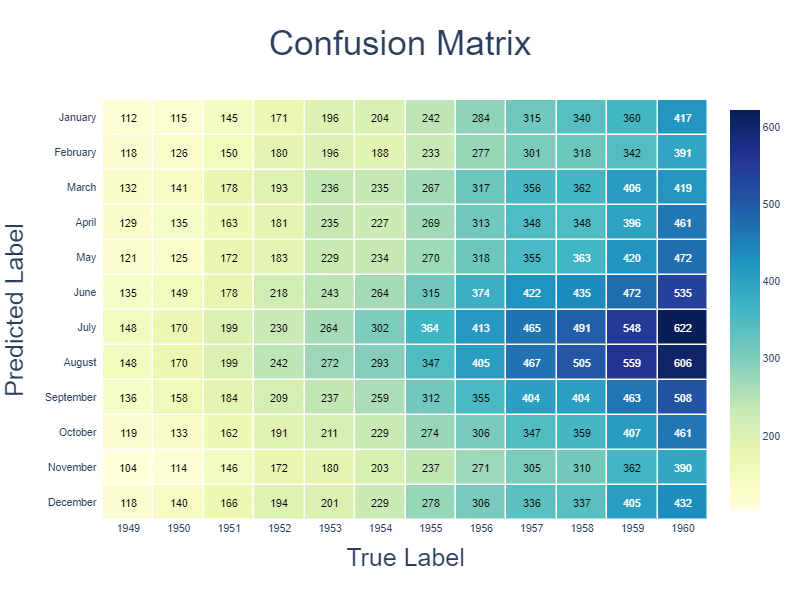

In [12]:
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

Confusion matrix, without normalization
Normalized confusion matrix


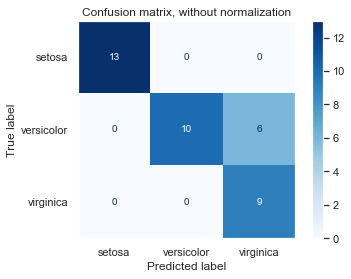

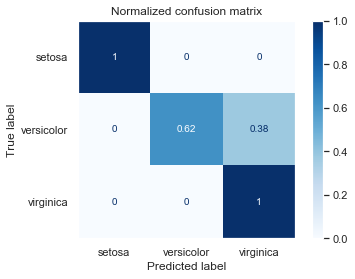

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    #print(disp.confusion_matrix)
    plt.grid(None)

plt.show()

In [25]:
y_pred = classifier.predict(X_test)
y_true = y_test

In [26]:
from sklearn.metrics import confusion_matrix

def cm_create(y_true, y_pred, cmap = 'YlGnBu', display_labels = None, normalize = False):
    cm = confusion_matrix(y_true, y_pred)
    items = len(cm)
    display_labels = list(display_labels)
    
    fig = ff.create_annotated_heatmap(z=cm, x=display_labels, y=display_labels, 
                                      colorscale=cmap,
                                      xgap=2, ygap=2,
                                      showscale = True,)

    fig.update_layout(font=dict(
                      family="Arial", size=25.5,),
                      title=dict(text = "Confusion Matrix", x = 0.5, y = .95, font = dict(size=35)),
                      autosize=False, width=700, height=600,
                      showlegend=False, template = "plotly_white",
                      xaxis_title=dict(text ="True Label", font = dict(size = 25)),
                      yaxis_title=dict(text ="Predicted Label", font = dict(size = 25)))

    fig.update_yaxes(showgrid=False, zeroline = False, autorange="reversed")
    fig.update_xaxes(showgrid=False, zeroline = False, side="bottom")
    fig.show()

In [27]:
cm_create(y_true, y_pred, display_labels = class_names)

In [20]:
%matplotlib inline

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

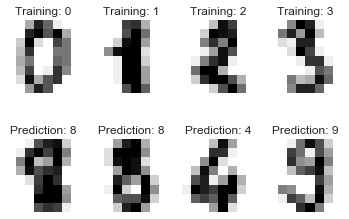

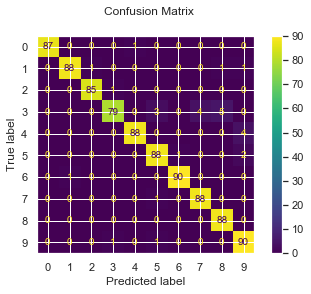

In [21]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

In [18]:
y_true = y_test
y_pred = classifier.predict(X_test)

In [19]:
cm_create(y_true, y_pred, cmap = 'YlGnBu', display_labels = classifier.classes_)